# Logistic Regression

* The purpose of Logistic Regression model is to establish a linear equation that defines the relationship between dependent and independent variables for the classification problem.



* Dependent variable is categorical



* The values generated by the Logistic Regression are between 0-1.



* The probability of occurrence of the value defined as 1 of the dependent variable is calculated. Therefore, the numerical  value of the dependent variable is not considered.

## 1-) First look at the data set

* **GOAL**:Is it possible to classify whether there is diabetes in a patient by looking at the information obtained from the results of medical tests performed on a patient?

In [1]:
import numpy as np
import pandas as pd 

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Outcome is  dependent variable



* Outcome = 1 means => the patient  **has** diabetes



* Outcome = 0  means => the patient **has not** diabetes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

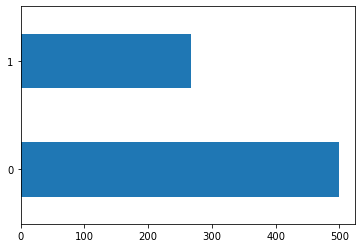

In [6]:
df["Outcome"].value_counts().plot.barh();

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 2-) Model

### 2.1-) Models by using Statsmodels Library

In [9]:
import statsmodels.api as sm

In [8]:
y = df["Outcome"] # y= dependent variable
X = df.drop(["Outcome"], axis=1)# x= independent variable

In [11]:
loj = sm.Logit(y, X)
loj_model= loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [12]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                 0.05922
Time:                        11:13:56   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

### 2.2-) Models by using Scikit-learn Library

In [13]:
from sklearn.linear_model import LogisticRegression

In [15]:
loj1 = LogisticRegression(solver = "liblinear")
loj_model1 = loj1.fit(X,y)

In [16]:
loj_model1

LogisticRegression(solver='liblinear')

In [18]:
loj_model1.intercept_

array([-5.89159518])

In [20]:
loj_model1.coef_

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

## 3-)Prediction

* With the model we created, we will try to estimate the category of the dependent variable using independent variables.



* Using existing data in data set , our model will try to predict whether people have diabetes.




* Using **confusion matrix**, we will find that the number of predictions made are correct.So we will measure the success of our model.

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
y_pred = loj_model1.predict(X)
y_pred[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [29]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [30]:
accuracy_score(y, y_pred)
# This value shows the percentage of dependent variables to be classified correctly.

0.7747395833333334

In [31]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



![alt text](https://files.knime.com/sites/default/files/5-confusion-matrix-class-statistics.png)

### 3.1-) Receiver Operating Characteristic(ROC)

![alt text](https://www.researchgate.net/publication/320807216/figure/fig3/AS:556294266253312@1509642296799/Receiver-Operating-Characteristic-ROC-curve-of-different-classifiers-for-the-benchmark.png)

* If only randomly prediction class of dependent variable  are made without creating any classification model, we obtain the diagonal line in the form of a dash shown in the figure above.



* We measure the success of our model as follows: the more area between the diagonal line and the graphic created by our model, the more successful our model is.


* In other words, the further the model graph is from the diagonal line, and the more space it takes up, the more successful it is.

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve

In [34]:
logit_roc_auc = roc_auc_score(y, loj_model1.predict(X))


In [37]:
fpr, tpr, thresholds = roc_curve(y, loj_model1.predict_proba(X)[:,1])

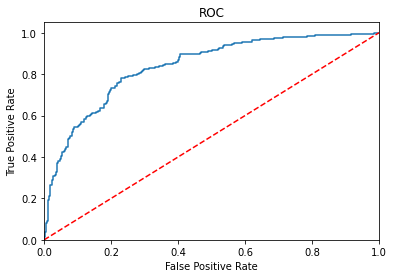

In [39]:
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## 4-) Model & Prediction and Model Tuning BY using train and test datagroup

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [41]:
y = df["Outcome"] # y= dependent variable
X = df.drop(["Outcome"], axis=1)# x= independent variable

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

### 4.1-) Model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
loj2 = LogisticRegression(solver = "liblinear")
loj_model2 = loj2.fit(X_train,y_train)
loj_model2

LogisticRegression(solver='liblinear')

## 4-2) Prediction

In [47]:
y_pred2=loj_model2.predict(X_test)
y_pred2[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [49]:
confusion_matrix(y_test, y_pred2)

array([[126,  25],
       [ 32,  48]], dtype=int64)

In [50]:
accuracy_score(y_test, y_pred2 )

0.7532467532467533

In [51]:
cross_val_score(loj_model2, X_test, y_test, cv = 10)

array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.7826087 , 0.65217391, 0.65217391, 0.7826087 ])

In [53]:
cross_val_score(loj_model2, X_test, y_test, cv = 10).mean()

0.7704710144927536